## Data Processing

The basic data processing is shown here. 
A train and test set are created from the first two events. 
As a first approach, events are not divided between train and test set.

In [1]:
import os
import copy
import matplotlib.pyplot as plt

import torch

import sys
sys.path.append('/Users/glucia/Projects/DeepLearning/TrackingML')
from core.data_handler import DataHandler
from utils.terminal_colors import TerminalColors as tc


In [2]:
input_dir = '../../data/train_1'
event_numbers = []
for filename in os.listdir(input_dir):
    if filename.endswith("-cells.csv"):
        event_number = filename.split("-")[0][5:]
        event_numbers.append(event_number)
event_numbers.sort()
print(tc.BOLD + f'Number of events: {len(event_numbers)}' + tc.RESET)

cell_csvs = [input_dir+f'/event{event_number}-cells.csv' for event_number in event_numbers]
hits_csvs = [input_dir+f'/event{event_number}-hits.csv' for event_number in event_numbers]
truth_csvs = [input_dir+f'/event{event_number}-truth.csv' for event_number in event_numbers]

data_handler = DataHandler(event_numbers[10:15], cell_csvs[10:15], hits_csvs[10:15], truth_csvs[10:15])

Number of events: 1770


In [3]:
data_handler.dataset['event_id'].unique()
data_handler.dataset['hit_id'].duplicated()

0           False
1            True
2            True
3            True
4            True
            ...  
74561856     True
74561857    False
74561858     True
74561859    False
74561860    False
Name: hit_id, Length: 74561861, dtype: bool

NOTE: to each hit_id correspond different channels (i.e. different activated pixels in the detector).

Let's use event 1000 for the train set and event 1001 for the test set.
Let's do the feature scaling step and make sure that everything is working as intended

In [4]:
train_set = copy.deepcopy(data_handler)
#train_set.dataset.query('event_id==1000', inplace=True)

test_set = copy.deepcopy(data_handler)
test_set.dataset.query('event_id==1001', inplace=True)

mean = train_set.mean()
std = train_set.std()

train_set.feature_scaling(mean, std)
test_set.feature_scaling(mean, std)

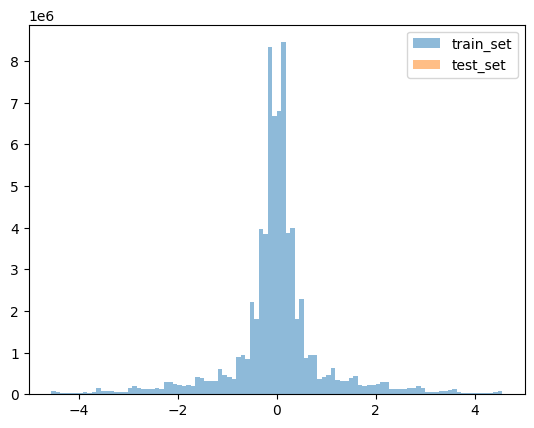

In [5]:
# plot x variable as a histogram for both train_set and test_set

plt.hist(train_set.dataset['x'], bins=100, alpha=0.5, label='train_set')
plt.hist(test_set.dataset['x'], bins=100, alpha=0.5, label='test_set')
plt.legend(loc='upper right')
plt.show()